## Agent performance loading

In [25]:
#!pip install -r requirements.txt
import pandas as pd
import json
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler

In [26]:
def read_json_to_dataframe(file_path):
    # Read the JSON file
    with open(file_path, 'r') as file:
        data = json.load(file)
    
    # Convert JSON data into DataFrame
    df = pd.DataFrame(data)
    
    return df

CHALLENGE_21 = 'agentPerformance_challenge_21.json'
CHALLENGE_22 = 'agentPerformance_challenge_22.json'
CHALLENGE_23 = 'agentPerformance_challenge_23.json'
CHALLENGE_24 = 'agentPerformance_challenge_24.json'

# Usage example:
df21 = read_json_to_dataframe(CHALLENGE_21)
df22 = read_json_to_dataframe(CHALLENGE_22)
df23 = read_json_to_dataframe(CHALLENGE_23)
df24 = read_json_to_dataframe(CHALLENGE_24)

print(f'Challenge 21 tests: {len(df21)}')
print(f'Challenge 22 tests: {len(df22)}')
print(f'Challenge 23 tests: {len(df23)}')
print(f'Challenge 24 tests: {len(df24)}')

Challenge 21 tests: 24
Challenge 22 tests: 23
Challenge 23 tests: 23
Challenge 24 tests: 23


In [36]:
def printTable(df, title='', showIndex=True, limit=10):

    print(title)
    print(tabulate(df[:limit], headers='keys', showindex=showIndex, tablefmt='grid'))

def analyze_challenge_performance(df : pd.DataFrame):
        grouped = df.groupby('map')
        for name, group in grouped:
            print(f'\n\nMap {name} - Agent performance')
            group['score_per_seconds'] = group['effectiveScore'] / (group['activityTime'] * 60)
            printTable(group.sort_values(by=['effectiveScore','averageTimePerMove'], ascending=True)[:K], 'Top 3 best agent perfomances')

K = 5
tests = pd.concat([df21, df22, df23, df24])
tests.drop(['initialScore','finalScore'], axis = 1)
tests['activityTime'] = tests['activityTime'].apply(lambda x: int(x.split(' ')[0].split(':')[0][1]))
analyze_challenge_performance(tests)



Map challenge_21 - Agent performance
Top 3 best agent perfomances
+----+--------------+------------+------------+----------------+-------------------------+-------------+-------------+----------------+----------------------+----------------+--------------+------------------+---------------------+-------------------+-----------------+-------------------+--------------------+---------------+-------------+---------------------+---------------------+
|    | map          | moveType   | fastPick   |   changingRisk |   adjMovementCostWindow | agentName   | agentID     |   activityTime |   averageTimePerMove |   initialScore |   finalScore |   effectiveScore |   effectiveMovement |   failedMovements |   pickUpActions |   deliveryActions |   parcelsDelivered |   searchCalls |   cacheHits |   onlineSolverCalls |   score_per_seconds |
+====+==============+============+============+================+=========================+=============+=============+================+======================+====

In [28]:
# Assuming 'df' is your DataFrame
groups = tests.groupby(['moveType', 'fastPick', 'changingRisk', 'adjMovementCostWindow'])

for name, group in groups:
    print(f"Group: {name} - Count: {len(group)}")
    #printTable(group, '')


Group: ('BFS', False, 0.0, 5000) - Count: 8
Group: ('BFS', False, 0.25, 5000) - Count: 8
Group: ('BFS', False, 0.5, 5000) - Count: 8
Group: ('BFS', False, 0.75, 5000) - Count: 8
Group: ('BFS', False, 1.0, 5000) - Count: 9
Group: ('BFS', True, 0.0, 5000) - Count: 9
Group: ('BFS', True, 0.25, 5000) - Count: 8
Group: ('BFS', True, 0.5, 1000) - Count: 8
Group: ('BFS', True, 0.5, 5000) - Count: 10
Group: ('BFS', True, 0.5, 20000) - Count: 1
Group: ('BFS', True, 0.75, 5000) - Count: 8
Group: ('BFS', True, 1.0, 5000) - Count: 8


Plot a line for each group of the specified variable. X rapresente the tests, Y the score achived in each test.
The average higher line rapresent the best average performance of the agent in different environment with the correspondant fixed setting.

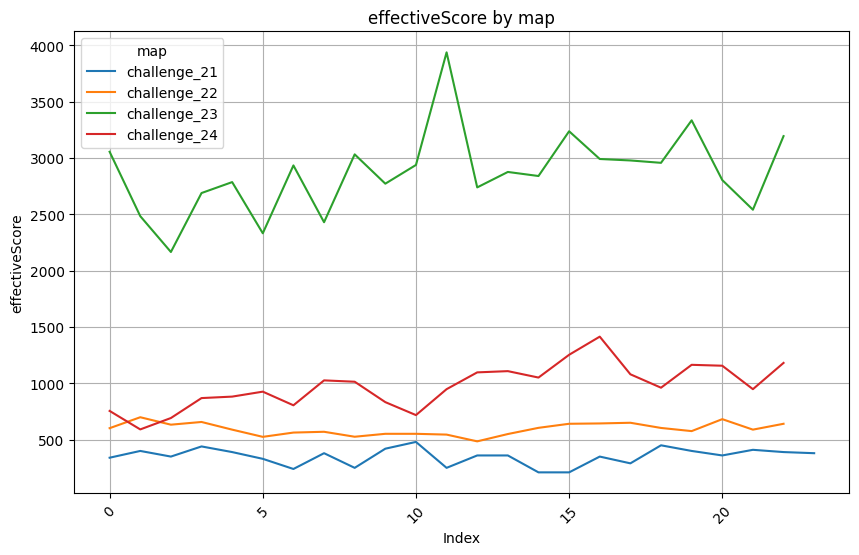

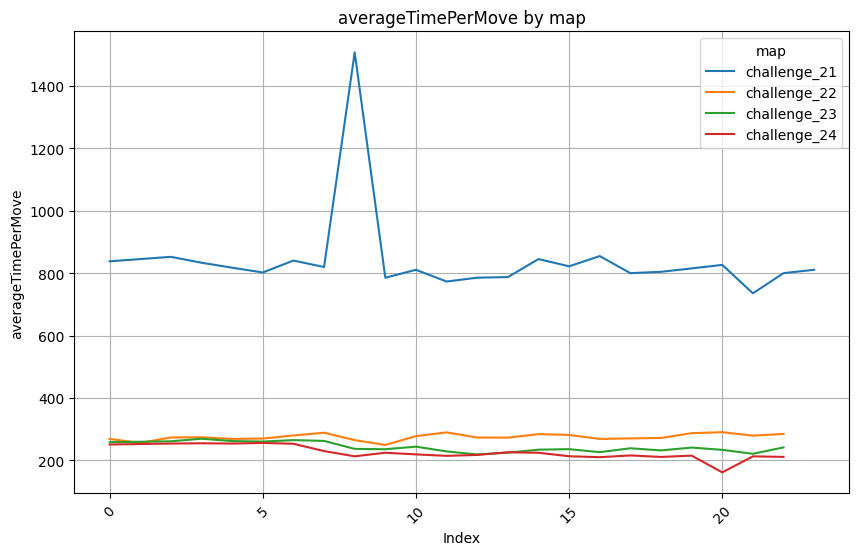

In [29]:
import matplotlib.pyplot as plt

def plot_grouped_lines(df, group_column, y_column):
    # Raggruppa il DataFrame per la colonna specificata
    grouped = df.groupby(group_column)
    
    plt.figure(figsize=(10, 6))  # Imposta la dimensione del grafico
    
    # Itera sui gruppi per tracciare ogni linea
    for name, group in grouped:
        # Usa l'indice del DataFrame come asse X
        plt.plot(group.index, group[y_column], label=name)
    
    plt.xlabel('Index')  # Etichetta per l'asse X
    plt.ylabel(y_column)  # Etichetta per l'asse Y
    plt.title(f'{y_column} by {group_column}')  # Titolo del grafico
    plt.legend(title=group_column)  # Legenda del grafico
    plt.xticks(rotation=45)  # Ruota le etichette dell'asse X per migliorare la leggibilità
    plt.grid(True)  # Aggiunge una griglia al grafico per migliorare la leggibilità
    plt.show()

# Uso della funzione
plot_grouped_lines(tests, 'map', 'effectiveScore')
plot_grouped_lines(tests, 'map', 'averageTimePerMove')


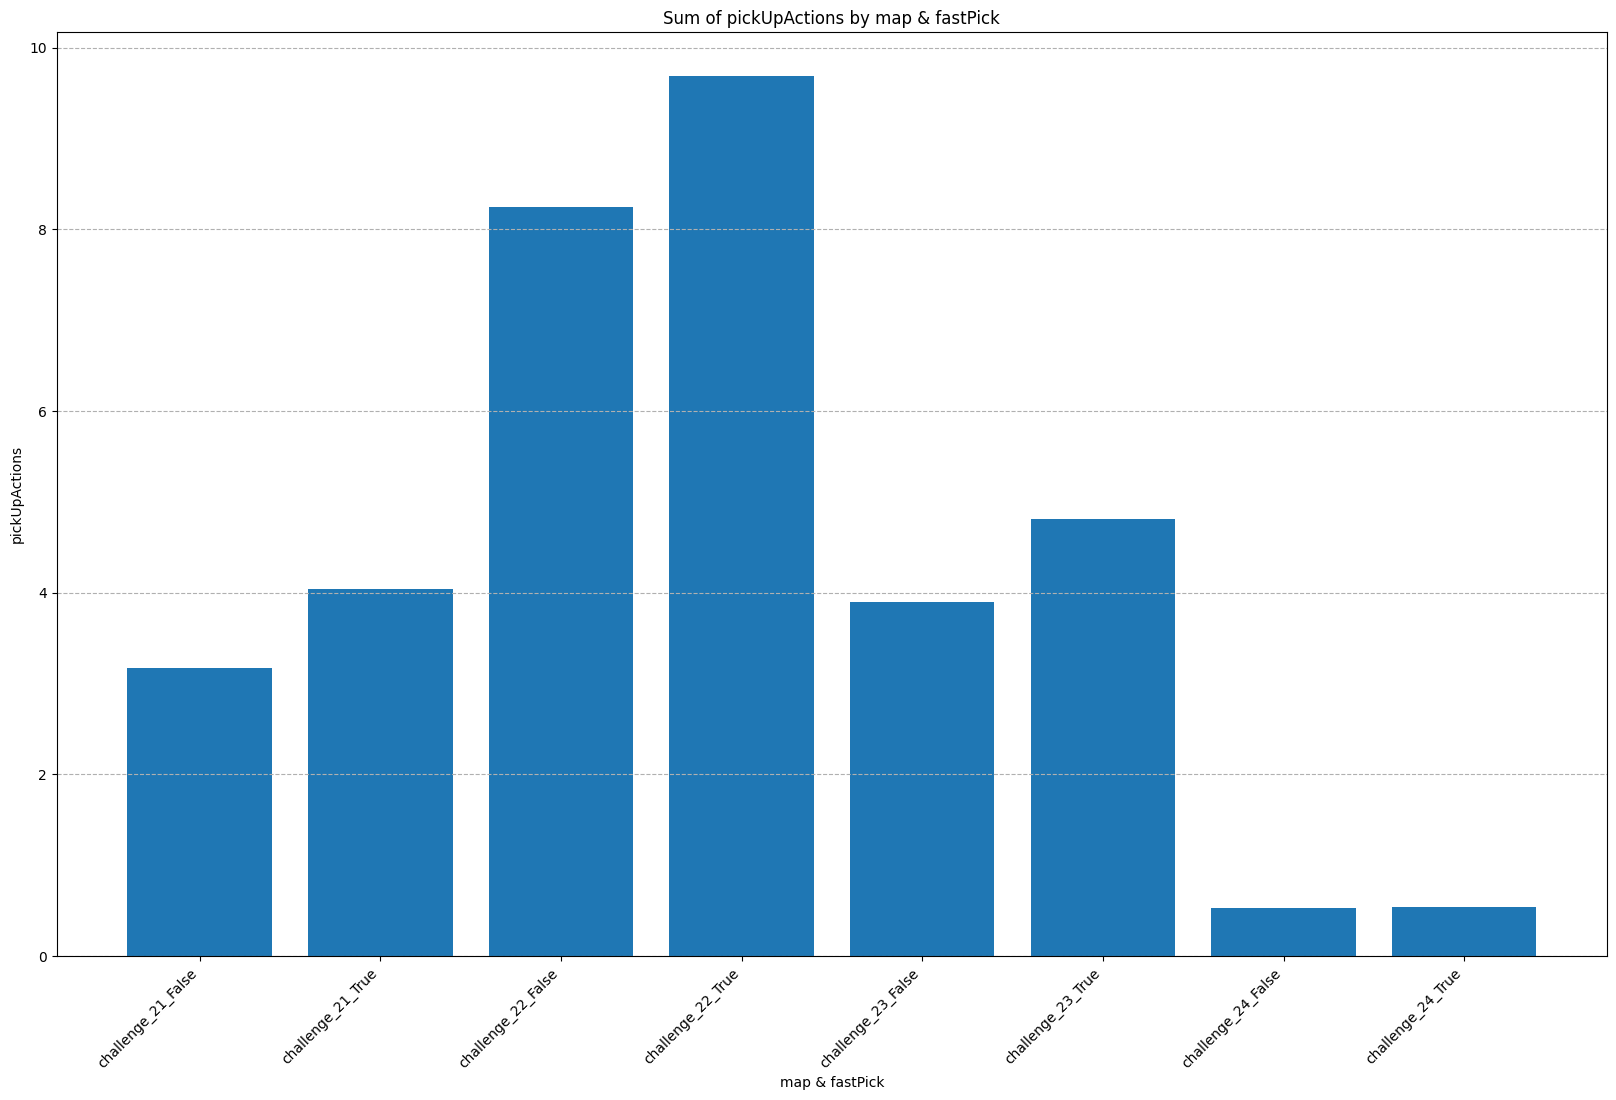

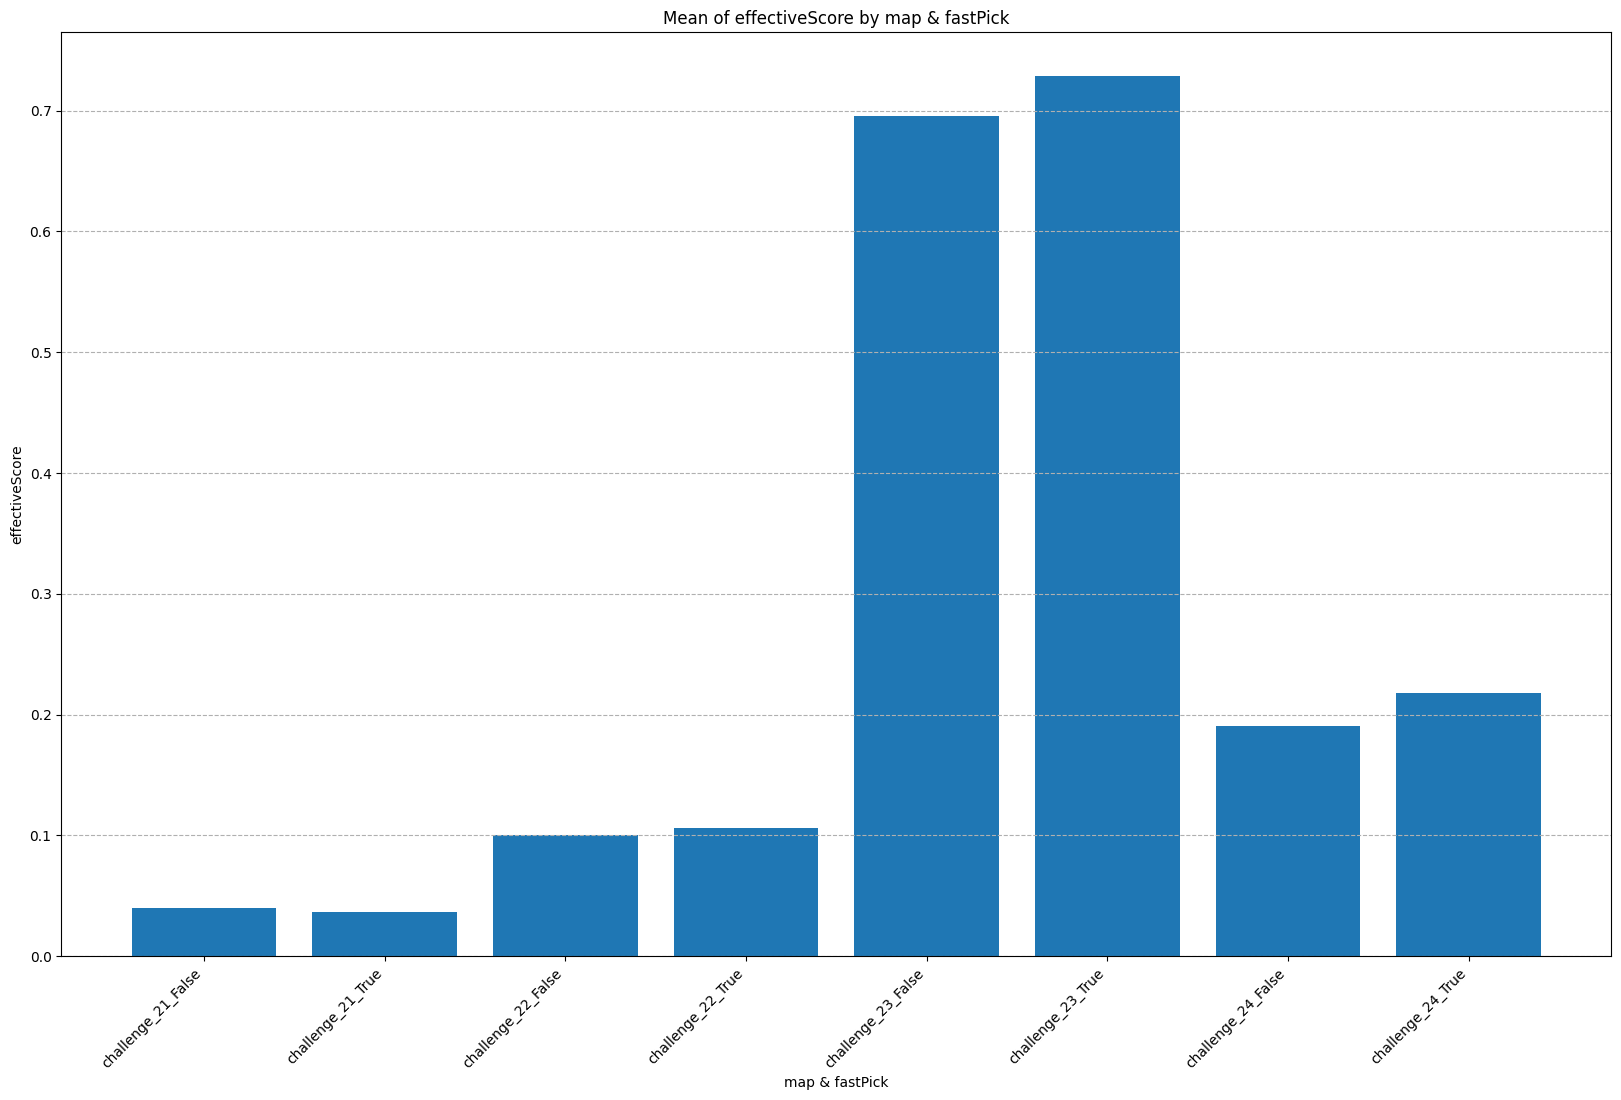

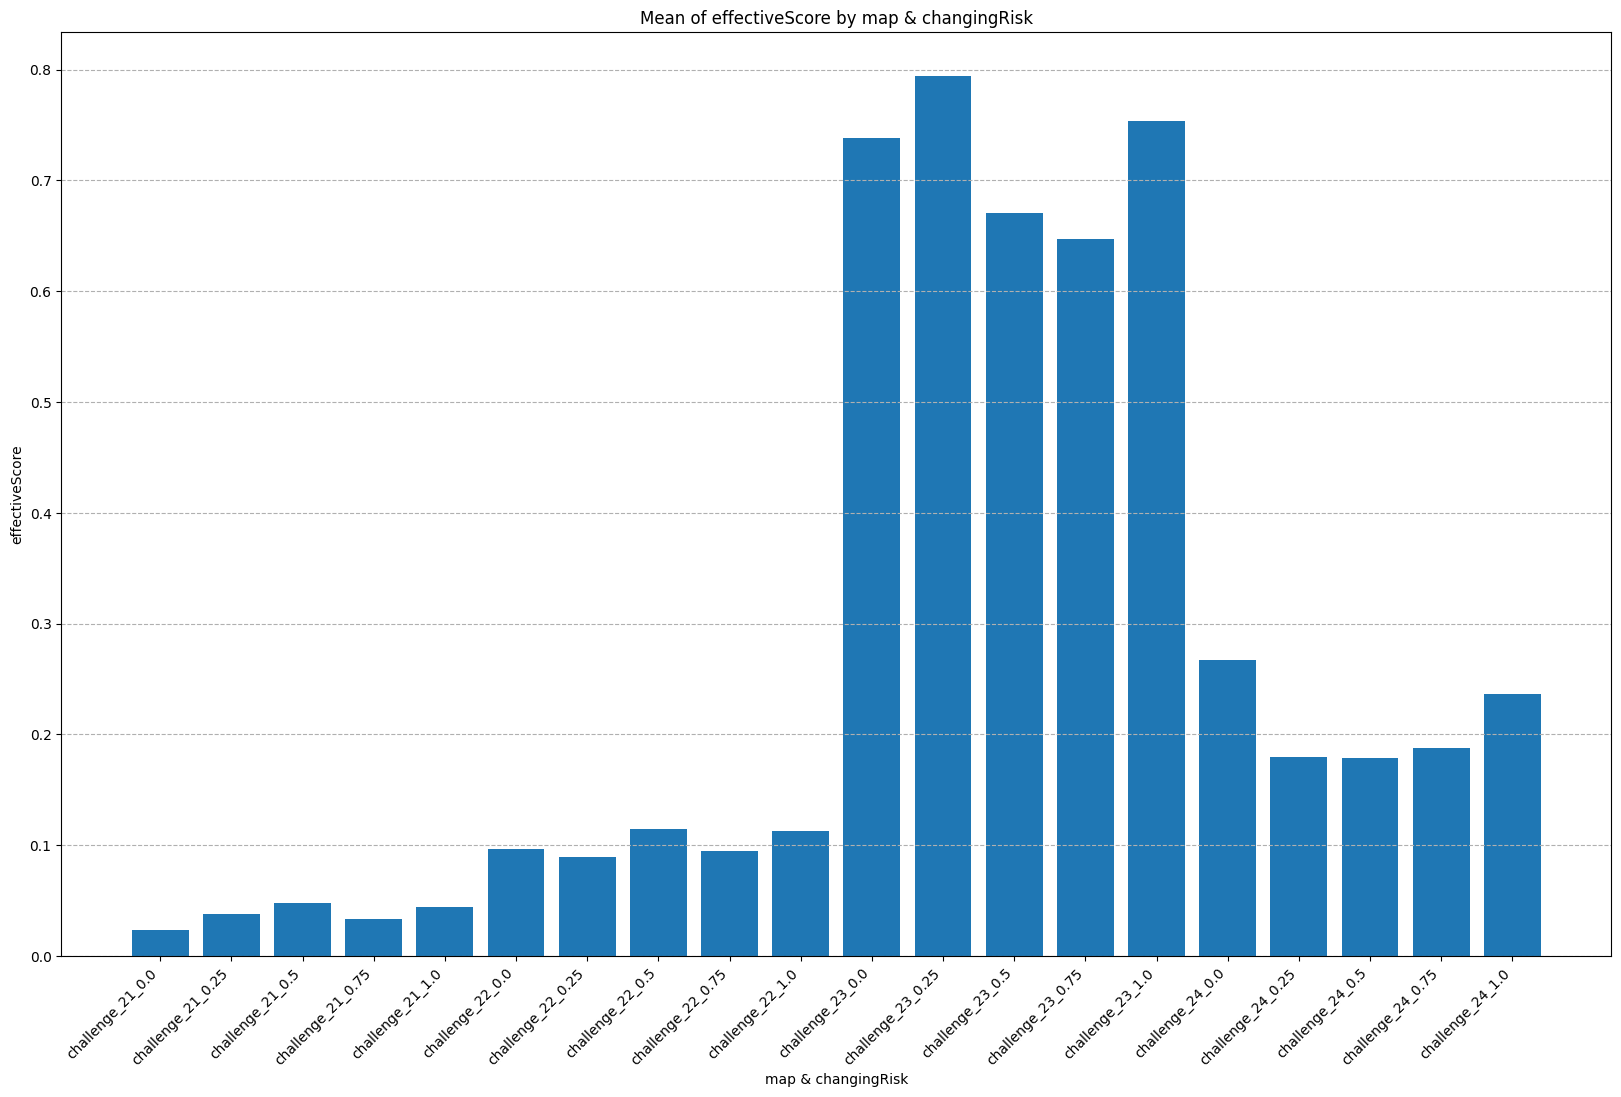

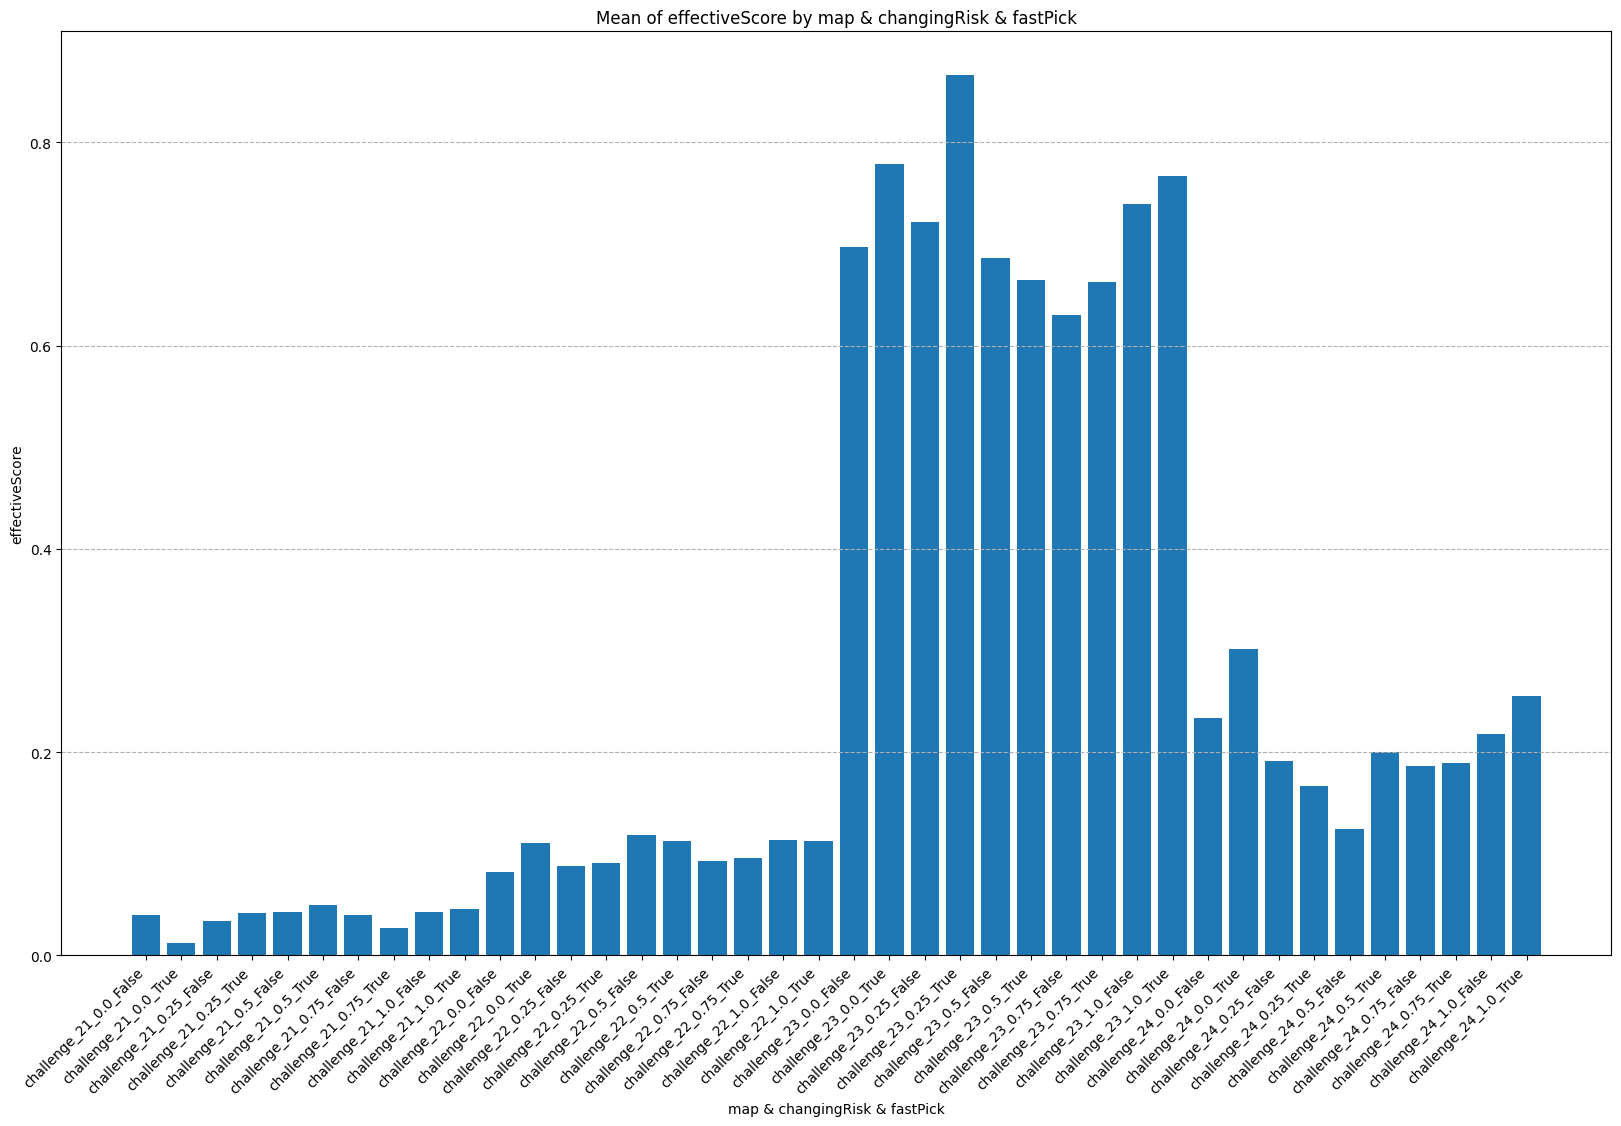

In [6]:
import matplotlib.pyplot as plt

def plot_grouped_bars(df, group_columns, y_column, aggregation='mean'):
    # Verifica che group_columns sia una lista, altrimenti la incapsula in una lista
    if not isinstance(group_columns, list):
        group_columns = [group_columns]
    
    # Calcola l'aggregazione specificata per la metrica y_column raggruppando per le colonne in group_columns
    aggregated_data = df.groupby(group_columns)[y_column].agg(aggregation).reset_index()
    
    # Crea un identificativo unico per ogni gruppo combinando i valori delle colonne di raggruppamento
    aggregated_data['group'] = aggregated_data[group_columns].apply(lambda x: '_'.join(x.astype(str)), axis=1)
    
    # Crea il grafico a barre usando l'identificativo unico come etichetta dell'asse X
    plt.figure(figsize=(20, 12))
    plt.bar(aggregated_data['group'], aggregated_data[y_column])

    plt.xlabel(' & '.join(group_columns))  # Etichetta per l'asse X che combina i nomi delle colonne di raggruppamento
    plt.ylabel(y_column)  # Etichetta per l'asse Y, basata sulla metrica specificata
    plt.title(f'{aggregation.capitalize()} of {y_column} by {" & ".join(group_columns)}')  # Titolo del grafico
    plt.xticks(rotation=45, ha="right")  # Ruota e allinea le etichette dell'asse X per migliorare la leggibilità
    plt.grid(axis='y', linestyle='--')  # Aggiunge una griglia orizzontale per facilitare la lettura delle barre
    plt.show()

# Uso della funzione
plot_grouped_bars(test_std, ['map','fastPick'], 'pickUpActions', 'sum')
plot_grouped_bars(test_std, ['map','fastPick'], 'effectiveScore', 'mean')
plot_grouped_bars(test_std, ['map','changingRisk'], 'effectiveScore', 'mean')
plot_grouped_bars(test_std, ['map','changingRisk','fastPick'], 'effectiveScore', 'mean')

